In [1]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()
from xgboost import XGBClassifier
xgbc=XGBClassifier()

import warnings  #import warnings kırmızı uyarı yazısını görmemek için yazılan kod
warnings.filterwarnings("ignore")

In [2]:
!pip install seaborn
!pip install sklearn
!pip install xgboost

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df1=pd.read_csv("ttrain (1).csv")
df2=pd.read_csv("ttest (1).csv")

In [5]:
df=df1.append(df2) #birleştirdim

### EDA

In [6]:
df.head() #ilk beş veri

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.sample(10) #rast gelen 10 veri 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
247,248,1.0,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
67,959,NaN,1,"Moore, Mr. Clarence Bloomfield",male,47.0,0,0,113796,42.4000,NaN,S
146,147,1.0,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
187,188,1.0,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S
769,770,0.0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S
543,544,1.0,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
530,531,1.0,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
108,109,0.0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
692,693,1.0,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
572,573,1.0,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S


In [8]:
df.shape #kaç satır kaç sütun

(1309, 12)

In [9]:
df.describe().T #istatiksel verileri,analizleri..

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [10]:
df.corr() #bir olayın olmasında diğer olayın ne kadar etkisi var?

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [11]:
df.info() 
#hangi sütunun hangi verilerden oluştuğunu gösterir


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
abs(df.corr()["Fare"]).sort_values(ascending=False)

Fare           1.000000
Pclass         0.558629
Survived       0.257307
Parch          0.221539
Age            0.178740
SibSp          0.160238
PassengerId    0.031428
Name: Fare, dtype: float64

In [13]:
df.isnull().sum() #kaç tane boş veri var

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
del df["Cabin"]
#cabin sütununda %20 den fazla boş ise silebilirsin

In [15]:
df.Embarked.value_counts() #limanlar

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
df["Embarked"].nunique() #kaç limana uğramış

3

In [17]:
df["Embarked"].mode() #en çok tekrar eden liman

0    S
Name: Embarked, dtype: object

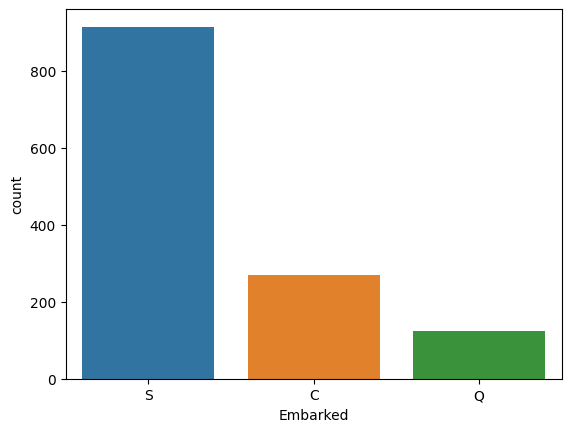

<Figure size 1500x500 with 0 Axes>

In [18]:
sns.countplot(x="Embarked",data=df) #limandan binenler
fig2=plt.figure(figsize=(15,5))


In [19]:
df["Title"]=df["Name"].str.extract('([A-Za-z]+)\.',expand=False)
#isimlerin başların mr,miss,mrs var bunları azalttım
#gereksiz boşluk ve nokta aralarını,a,z ne kadar rakam karakter varsa(extract) ile buldum


In [20]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [21]:
df["Title"]=df["Title"].replace(['Ms','Mlle'],'Miss')
df["Title"]=df["Title"].replace(['Dr','Major','Col','Don','Sir','Jonkheer','Rev','Capt'],'Mr')
df["Title"]=df["Title"].replace(['Countess','Dona','Lady','Mme'],'Mrs')

In [22]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
#bunları katkısı olmadığı için attım

In [23]:
df["Sex"].nunique() #cinsiyet

2

<AxesSubplot:xlabel='Sex', ylabel='count'>

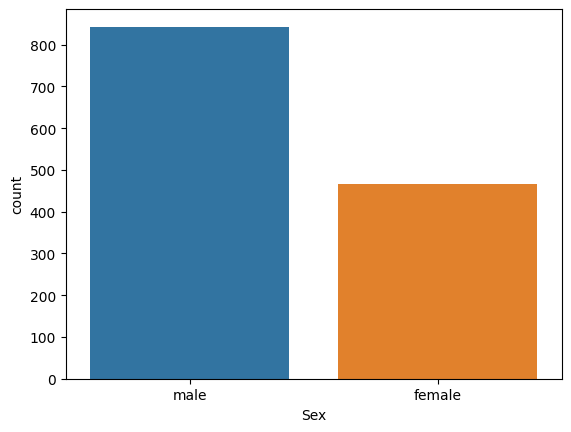

In [24]:
df["Sex"].value_counts() #kaç erkek kaç kadın 
sns.countplot(x="Sex",data=df)

In [25]:
df[df.Sex=='male']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
4,0.0,3,male,35.0,0,0,8.0500,S,Mr
5,0.0,3,male,NaN,0,0,8.4583,Q,Mr
6,0.0,1,male,54.0,0,0,51.8625,S,Mr
7,0.0,3,male,2.0,3,1,21.0750,S,Master
...,...,...,...,...,...,...,...,...,...
407,NaN,1,male,50.0,1,1,211.5000,C,Mr
413,NaN,3,male,NaN,0,0,8.0500,S,Mr
415,NaN,3,male,38.5,0,0,7.2500,S,Mr
416,NaN,3,male,NaN,0,0,8.0500,S,Mr


In [26]:
df['Age'].mean() #yaş ortalaması

29.881137667304014

In [27]:
df["Age"].std() #standart sapması

14.413493211271321

In [28]:
df["Age"].min() #minumum kaç yasında insan var

0.17

In [29]:
df["Age"].max() #max insan yaşı

80.0

In [30]:
df[df["Age"]>=18] #yaşı 18 üstü olanlar

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
407,NaN,1,male,50.0,1,1,211.5000,C,Mr
411,NaN,1,female,37.0,1,0,90.0000,Q,Mrs
412,NaN,3,female,28.0,0,0,7.7750,S,Miss
414,NaN,1,female,39.0,0,0,108.9000,C,Mrs


In [31]:
df[df["Age"]<=18] #18 den küçük

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
7,0.0,3,male,2.0,3,1,21.0750,S,Master
9,1.0,2,female,14.0,1,0,30.0708,C,Mrs
10,1.0,3,female,4.0,1,1,16.7000,S,Miss
14,0.0,3,female,14.0,0,0,7.8542,S,Miss
16,0.0,3,male,2.0,4,1,29.1250,Q,Master
...,...,...,...,...,...,...,...,...,...
389,NaN,3,male,6.0,3,1,21.0750,S,Master
392,NaN,3,male,13.0,0,2,20.2500,S,Master
395,NaN,1,female,18.0,1,0,60.0000,S,Mrs
403,NaN,1,male,17.0,0,0,47.1000,S,Mr


In [32]:
df.Age[df.Sex=='female'] #kadınların yaş sütunu

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
409     3.0
410     NaN
411    37.0
412    28.0
414    39.0
Name: Age, Length: 466, dtype: float64

In [33]:
df.groupby("Survived").mean() #hayatta kalanların yaş ortalamsı
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,NaN,0,0,8.0500,S,Mr
414,NaN,1,female,39.0,0,0,108.9000,C,Mrs
415,NaN,3,male,38.5,0,0,7.2500,S,Mr
416,NaN,3,male,NaN,0,0,8.0500,S,Mr


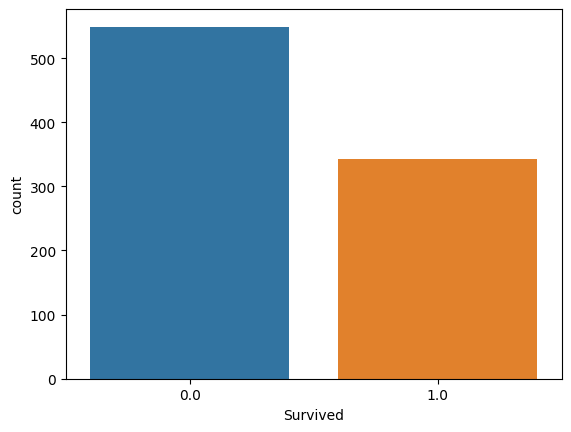

<Figure size 1500x1000 with 0 Axes>

In [34]:
sns.countplot(x="Survived",data=df) #hayatta kalanlar
fig2=plt.figure(figsize=(15,10)) #boyut için


In [35]:
df.groupby('Sex')['Survived'].mean() #erkeklerin ve kadınların hayatta kalanların ortalaması

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [36]:
df["FamilySize"]=df["SibSp"]+df["Parch"]+1
df.FamilySize.value_counts()
#aile sayısını ve +1 kendisini ekledim
#benim bu işlemimde de feature engineering var

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [37]:
df.columns #sütun isimleri

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize'],
      dtype='object')

<AxesSubplot:title={'center':'Line chart'}>

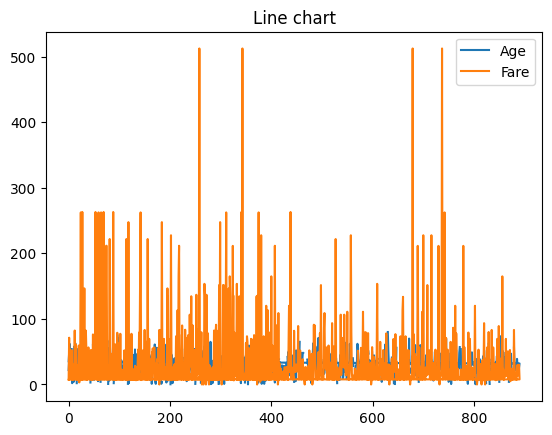

In [38]:
df[['Age','Fare']].plot.line(title='Line chart')
#yaş ve ödediği parayı tek bir grafikte gösterdim

In [39]:
abs(df.corr()["Fare"]).sort_values(ascending=False)

Fare          1.000000
Pclass        0.558629
Survived      0.257307
FamilySize    0.226492
Parch         0.221539
Age           0.178740
SibSp         0.160238
Name: Fare, dtype: float64

In [40]:
x=df[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Title","FamilySize"]]
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize
0,0.0,3,male,22.0,1,0,7.2500,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,Mr,1


In [41]:
df_dummies=pd.get_dummies(df,drop_first=True)


In [43]:
df_train=df_dummies[:891]
df_test=df_dummies[891:]

In [44]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [45]:
x_train=df_train.drop(columns=["Survived"])

In [46]:
y=df1["Survived"]

In [47]:
x_test=df_test.drop(columns=["Survived"])

In [54]:
model=Sequential()
model.add(Dense(14,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(x_train,y,epochs=500, batch_size=10, verbose=1)

model.summary()

Epoch 1/500
90/90 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.6094
Epoch 2/500
90/90 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 3/500
90/90 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 4/500
90/90 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 5/500
90/90 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 6/500
90/90 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 7/500
90/90 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 8/500
90/90 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6162
Epoch 9/500
90/90 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 10/500
90/90 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 11/500
90/90 [===================

In [51]:
!pip install tensorflow

In [52]:
!pip install keras

In [49]:
from keras.models import Sequential


In [55]:
from keras.layers import Activation, Dense

In [56]:
scores=model.evaluate(x_train,y)

28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162


In [58]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 61.62%
